In [ ]:
from __future__ import annotations
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from mplsoccer import PyPizza, FontManager

In [ ]:
from typing import Tuple

# [CDAF] Atividade 2

## Nome e matrícula
Nome: Igor Lacerda Faria da Silva
Matrícula: 2020041973

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2022 do FBRef.

## Questão 1
- Baixe o dataset de resultados em https://fbref.com/en/comps/24/2022/schedule/2022-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e dif. xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

In [ ]:
df = pd.read_csv("./serie-a.csv")

In [ ]:
df = df.dropna()

In [1]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 405
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Wk            326 non-null    float64
 1   Day           326 non-null    object 
 2   Date          326 non-null    object 
 3   Time          326 non-null    object 
 4   Home          326 non-null    object 
 5   xG            326 non-null    float64
 6   Score         326 non-null    object 
 7   xG.1          326 non-null    float64
 8   Away          326 non-null    object 
 9   Attendance    326 non-null    float64
 10  Venue         326 non-null    object 
 11  Referee       326 non-null    object 
 12  Match Report  326 non-null    object 
dtypes: float64(4), object(9)
memory usage: 35.7+ KB


In [ ]:
df = df.drop(columns=["Referee", "Attendance", "Venue", "Match Report"])

In [2]:
df.head()

    Wk  Day        Date   Time              Home   xG Score  xG.1           Away
0  1.0  Sat  2022-04-09  16:30        Fluminense  1.6   0–0   0.1         Santos
1  1.0  Sat  2022-04-09  19:00    Atl Goianiense  1.4   1–1   1.2       Flamengo
2  1.0  Sun  2022-04-10  11:00          Coritiba  1.7   3–0   0.4          Goiás
3  1.0  Sun  2022-04-10  16:00  Atlético Mineiro  1.9   2–0   0.6  Internacional
4  1.0  Sun  2022-04-10  16:00     Botafogo (RJ)  1.5   1–3   2.1    Corinthians

In [ ]:
TEAMS = ["Fluminense", "Atlético Mineiro", "São Paulo", "Palmeiras"]

In [ ]:
WINDOW = 5

In [ ]:
expected_goals_global = df["xG"].rolling(WINDOW, min_periods=1).mean()
expected_goals_away_global = df["xG.1"].rolling(WINDOW, min_periods=1).mean()
diff_global = expected_goals_global.sub(expected_goals_away_global)

In [ ]:
dataTeam = Tuple[str, pd.Series, pd.Series, pd.Series]

In [ ]:
my_teams_data: list[dataTeam] = []
all_teams_data: list[dataTeam] = []

In [ ]:
all_teams = df["Home"].unique()
for team in all_teams:
    df_team = df.query(f"Home == '{team}' or Away == '{team}'")
    expected_team = df_team.apply(
        lambda x: x["xG"] if x["Home"] == team else x["xG.1"],
        axis=1,
    ).reset_index(drop=True)
    expected_team = expected_team.rolling(WINDOW, min_periods=1).mean()
    expected_away = df_team.apply(
        lambda x: x["xG.1"] if x["Home"] == team else x["xG"],
        axis=1,
    ).reset_index(drop=True)
    diff = expected_team - expected_away
    team_data = (team, expected_team, expected_away, diff)

    all_teams_data.append(team_data)

    if TEAMS.count(team) > 0:
        my_teams_data.append(team_data)

In [ ]:
# Dados gerais
expected = []
for series in zip(*[tup[1] for tup in all_teams_data]):
    item_mean = sum(series) / len(series)
    expected.append(item_mean)
away = []
for series in zip(*[tup[2] for tup in all_teams_data]):
    item_mean = sum(series) / len(series)
    away.append(item_mean)
diff = []
for series in zip(*[tup[3] for tup in all_teams_data]):
    item_mean = sum(series) / len(series)
    diff.append(item_mean)

In [ ]:
def plot_common():
    plt.ylabel("Gols")
    plt.xlabel("Jogo")
    plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
    plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()

In [ ]:
def plot_metric(
    teams_data: list[dataTeam],
    name: str,
    general: list[float],
    index: int,
):
    plt.plot(general, label="Todos os times", linestyle="--")
    for team in teams_data:
        plt.plot(team[index], label=f"{name} {team[0]}")
    plot_common()

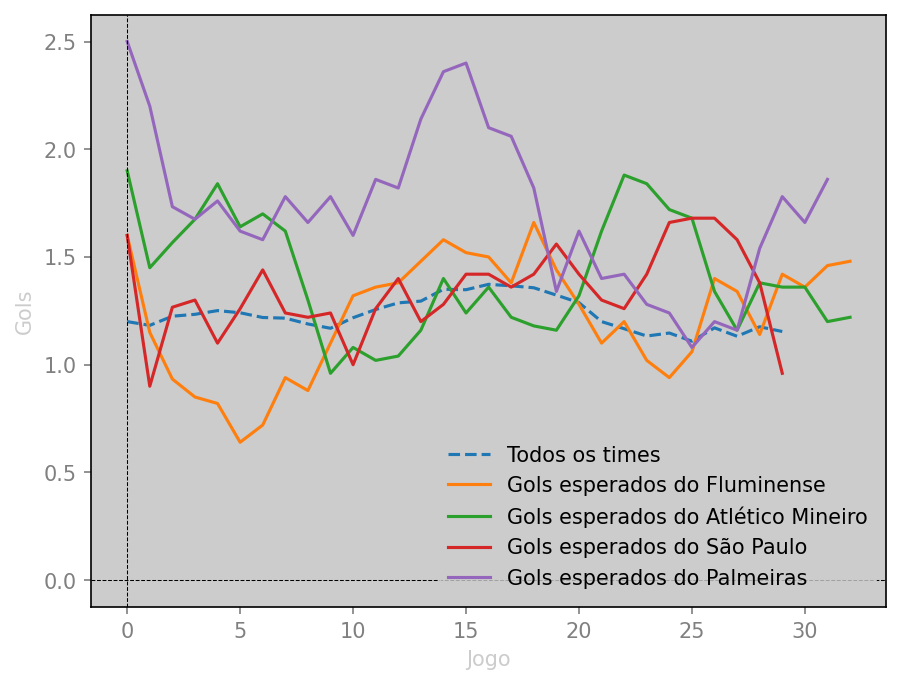

In [3]:
plot_metric(my_teams_data, "Gols esperados do", expected, 1)

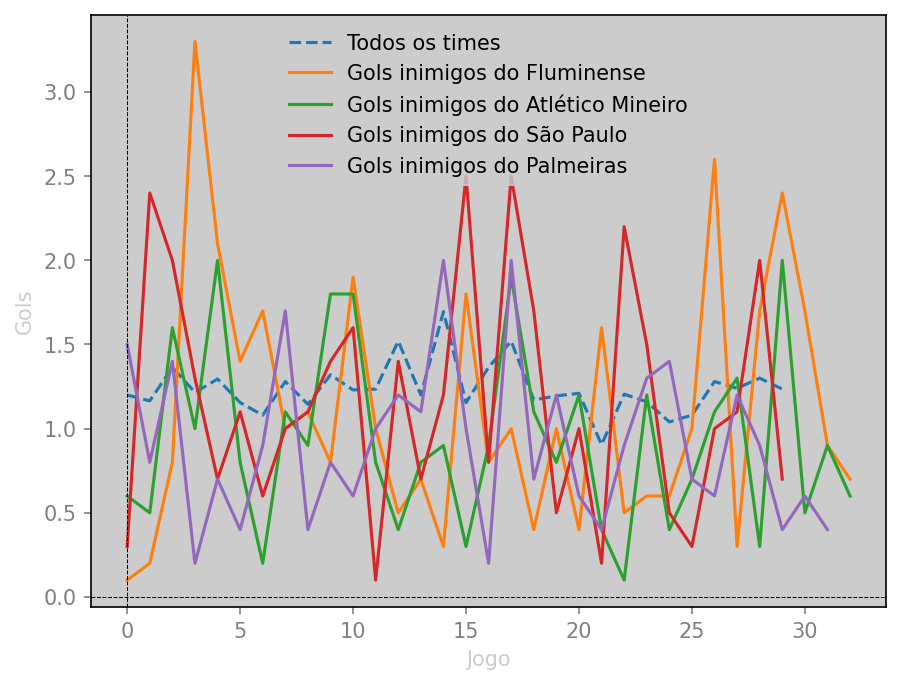

In [4]:
plot_metric(my_teams_data, "Gols inimigos do", away, 2)

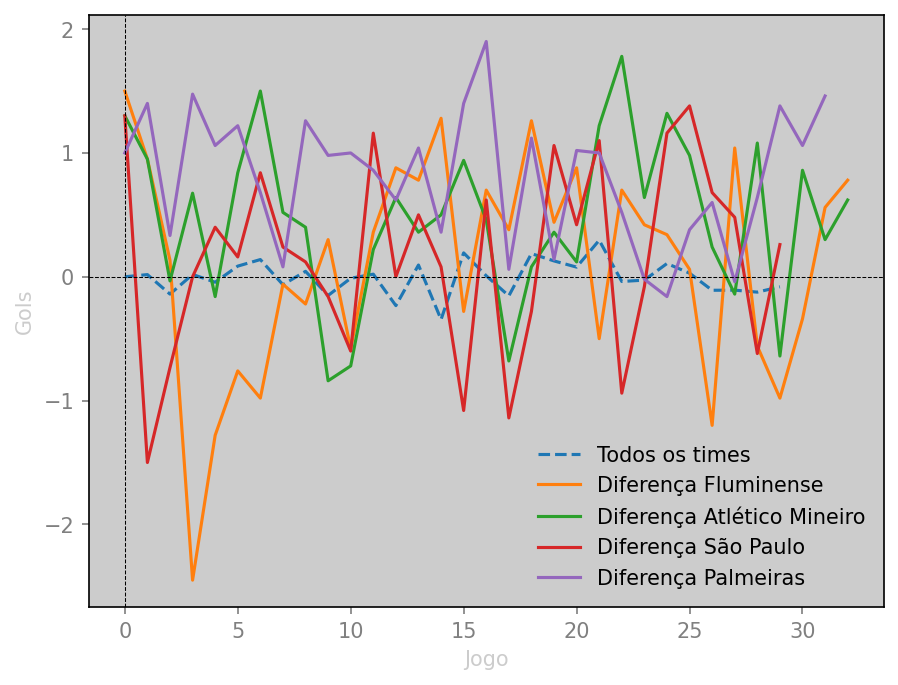

In [5]:
plot_metric(my_teams_data, "Diferença", diff, 3)

### Análise

O Palmeiras teve um breve período de altíssima qualidade ofensiva, no meio da temporada, enquanto o Fluminense teve uma baixa no começo. Em termos de defesa, o Fluminense teve o maior pico logo no começo da temporada, mas por haver grande variação ao longo do período, é difícil realizar comparações.

## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela à outra?

In [ ]:
WINDOW = 10

In [ ]:
expected_goals_global = df["xG"].rolling(WINDOW, min_periods=1).mean()
expected_goals_away_global = df["xG.1"].rolling(WINDOW, min_periods=1).mean()
diff_global = expected_goals_global.sub(expected_goals_away_global)

In [ ]:
my_teams_data: list[dataTeam] = []
all_teams_data: list[dataTeam] = []

In [ ]:
all_teams = df["Home"].unique()
for team in all_teams:
    df_team = df.query(f"Home == '{team}' or Away == '{team}'")
    expected_team = df_team.apply(
        lambda x: x["xG"] if x["Home"] == team else x["xG.1"],
        axis=1,
    ).reset_index(drop=True)
    expected_team = expected_team.rolling(WINDOW, min_periods=1).mean()
    expected_away = df_team.apply(
        lambda x: x["xG.1"] if x["Home"] == team else x["xG"],
        axis=1,
    ).reset_index(drop=True)
    diff = expected_team - expected_away
    team_data = (team, expected_team, expected_away, diff)

    all_teams_data.append(team_data)

    if TEAMS.count(team) > 0:
        my_teams_data.append(team_data)

In [ ]:
# Dados gerais
expected = []
for series in zip(*[tup[1] for tup in all_teams_data]):
    item_mean = sum(series) / len(series)
    expected.append(item_mean)
away = []
for series in zip(*[tup[2] for tup in all_teams_data]):
    item_mean = sum(series) / len(series)
    away.append(item_mean)
diff = []
for series in zip(*[tup[3] for tup in all_teams_data]):
    item_mean = sum(series) / len(series)
    diff.append(item_mean)

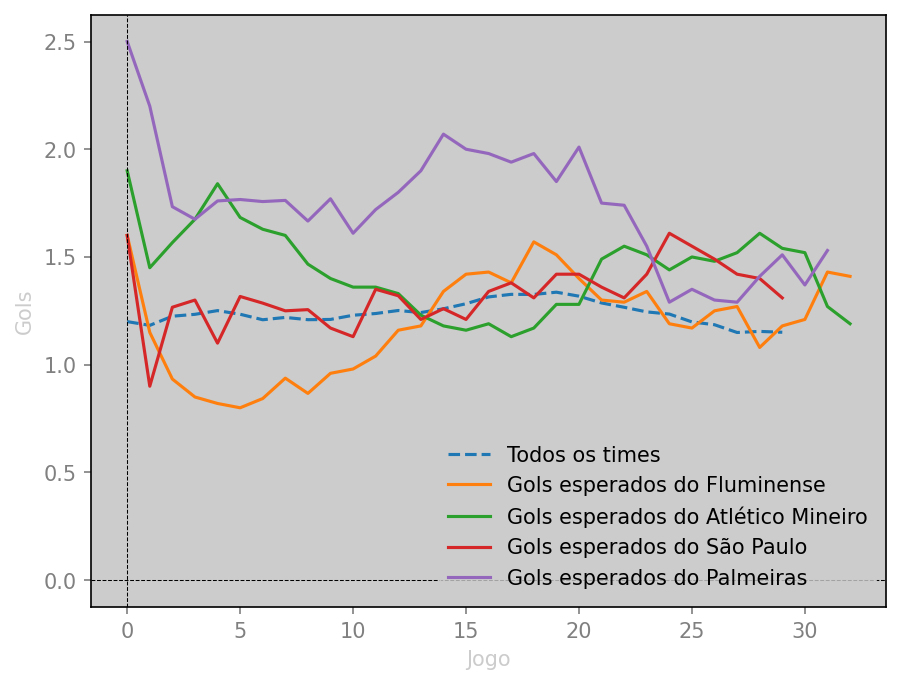

In [6]:
plot_metric(my_teams_data, "Gols esperados do", expected, 1)

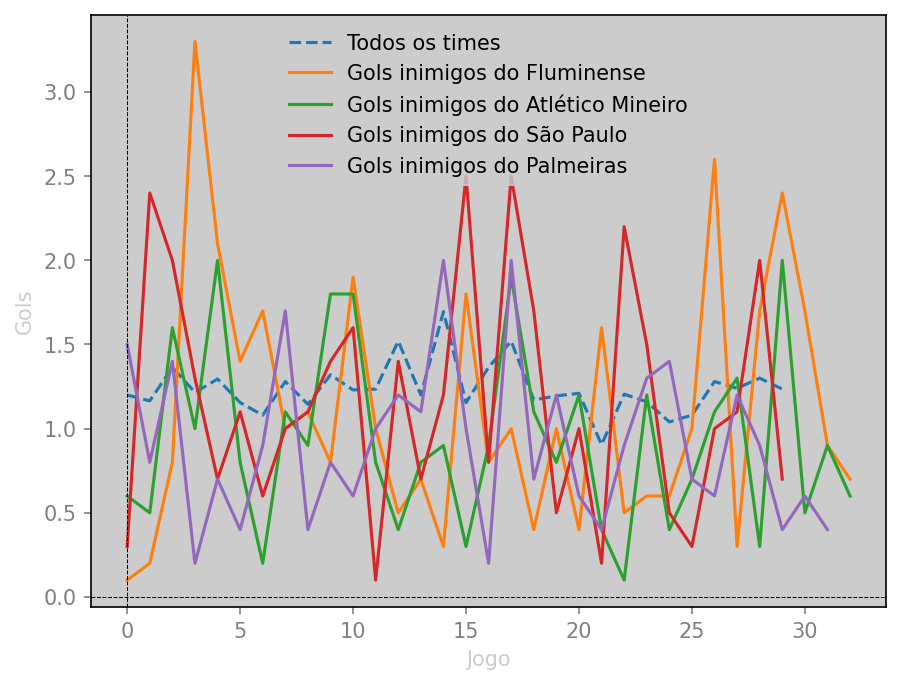

In [7]:
plot_metric(my_teams_data, "Gols inimigos do", away, 2)

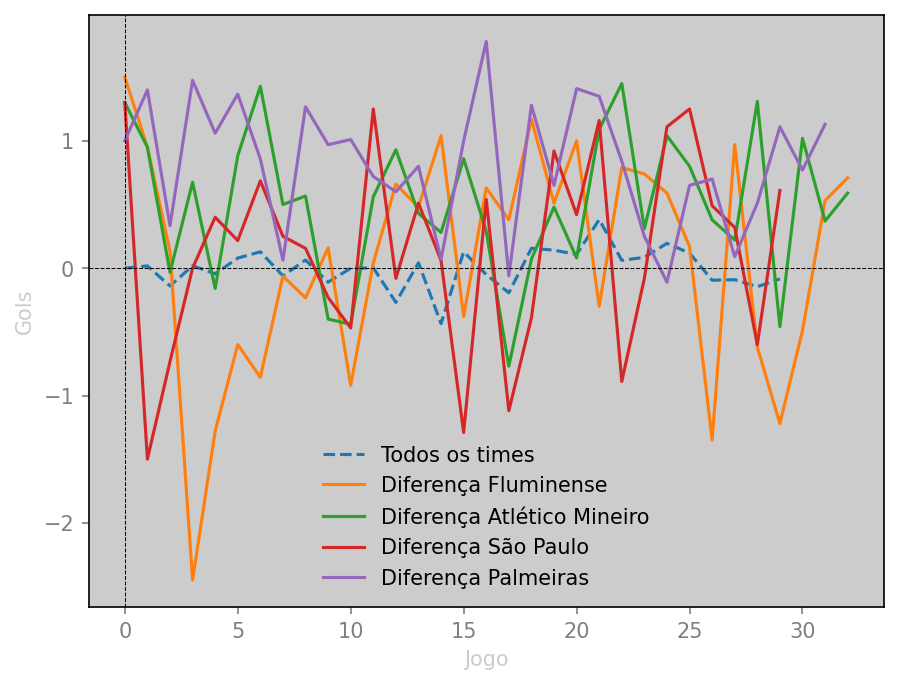

In [8]:
plot_metric(my_teams_data, "Diferença", diff, 3)

### Análise

Não houve tanta diferença em relação ao item anterior. A meia de gols esperados ficou bem mais suave, e indica que o Palmeiras pe um time mais sólido em ataque, mas as outas métricas ainda são "caóticas".

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2022/stats/2022-Serie-A-Stats
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios à partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

In [ ]:
COLOR = "#000000"

In [ ]:
def radar_plot(stats: list[str], percentiles: list[float], player: str, league: str):
    slice_colors = ["blue"] * 2 + ["green"] * 2 + ["red"] * 2
    text_colors = ["white"] * 6
    font_normal = FontManager(
        (
            "https://github.com/google/fonts/blob/main/apache/roboto/"
            "Roboto%5Bwdth,wght%5D.ttf?raw=true"
        )
    )
    font_bold = FontManager(
        (
            "https://github.com/google/fonts/blob/main/apache/robotoslab/"
            "RobotoSlab%5Bwght%5D.ttf?raw=true"
        )
    )
    # PIZZA PLOT
    baker = PyPizza(
        params=stats,
        min_range=None,
        max_range=None,  # list of parameters
        straight_line_color=COLOR,  # color for straight lines
        straight_line_lw=1,  # linewidth for straight lines
        last_circle_lw=1,  # linewidth of last circle
        other_circle_lw=1,  # linewidth for other circles
        other_circle_ls="-.",  # linestyle for other circles
    )
    rounded_list = [round(num, 2) for num in percentiles]
    # making pizza for our data
    fig, _ = baker.make_pizza(
        rounded_list,  # list of values
        figsize=(10, 10),  # adjust figsize according to your need
        param_location=110,
        slice_colors=slice_colors,
        value_colors=text_colors,
        value_bck_colors=slice_colors,  # where the parameters will be added
        kwargs_slices=dict(
            facecolor="cornflowerblue", edgecolor=COLOR, zorder=2, linewidth=1
        ),  # values to be used when plotting slices
        kwargs_params=dict(
            color=COLOR, fontsize=12, fontproperties=font_normal.prop, va="center"
        ),  # values to be used when adding parameter
        kwargs_values=dict(
            color=COLOR,
            fontsize=12,
            fontproperties=font_normal.prop,
            zorder=3,
            bbox=dict(
                edgecolor=COLOR,
                facecolor="cornflowerblue",
                boxstyle="round,pad=0.2",
                lw=1,
            ),
        ),  # values to be used when adding parameter-values
    )

    # add title
    fig.text(
        0.515,
        0.97,
        player,
        size=18,
        ha="center",
        fontproperties=font_bold.prop,
        color=COLOR,
    )

    # add subtitle
    fig.text(
        0.515,
        0.942,
        league,
        size=15,
        ha="center",
        fontproperties=font_bold.prop,
        color=COLOR,
    )
    plt.show()

In [ ]:
df_br = pd.read_csv("./big_brazillian.csv")

In [9]:
df_br.head()

   Rk             Player  Nation Pos  ... npxG.1  npxG+xAG.1  Matches     -9999
0   1        Germán Cano  ar ARG  FW  ...   0.54        0.58  Matches  9ccf4e14
1   2         Pedro Raul  br BRA  FW  ...   0.34        0.40  Matches  ed074559
2   3   Jonathan Calleri  ar ARG  FW  ...   0.37        0.47  Matches  6922f806
3   4  Guilherme Bissoli  br BRA  FW  ...   0.17        0.20  Matches  c9024e62
4   5    Marcos Leonardo  br BRA  FW  ...   0.36        0.47  Matches  3f47ebce

[5 rows x 38 columns]

In [ ]:
stats_atk = ["xG", "npxG", "Gls", "PrgR", "PrgC", "G+A", "Player", "Pos"]
filter_atk = ["FW", "LW", "RW"]

In [ ]:
def clean_and_normalize(df: pd.DataFrame, columns: list, filter: list):
    df_aux = df.loc[:, columns]
    df_aux = df_aux[df_aux["Pos"].isin(filter)]
    df_num = df_aux.select_dtypes(include="number")
    df_num_cols = df_num.columns
    df_norm = MinMaxScaler().fit_transform(df_num)
    df_aux.drop(columns=["Pos"], inplace=True)
    df_aux[df_num_cols] = df_norm * 100
    return df_aux

In [ ]:
df_atk = clean_and_normalize(df_br, stats_atk, filter_atk)

In [ ]:
attackers = ["Hulk", "Rony", "Luciano"]

In [ ]:
def get_players_data(group: list, df: pd.DataFrame):
    players_data = []
    for player in group:
        data = df.query(f"Player == '{player}'")
        data = data.values.tolist()[0]
        players_data.append(data)
    return players_data

In [ ]:
attackers_data = get_players_data(attackers, df_atk)

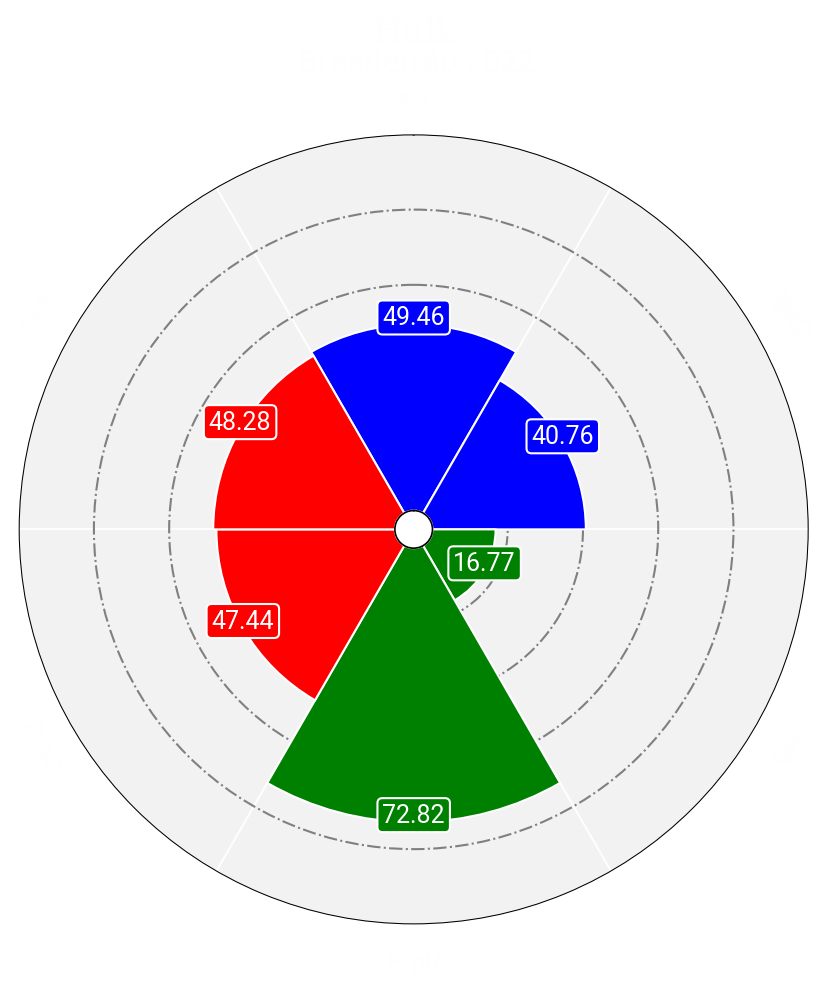

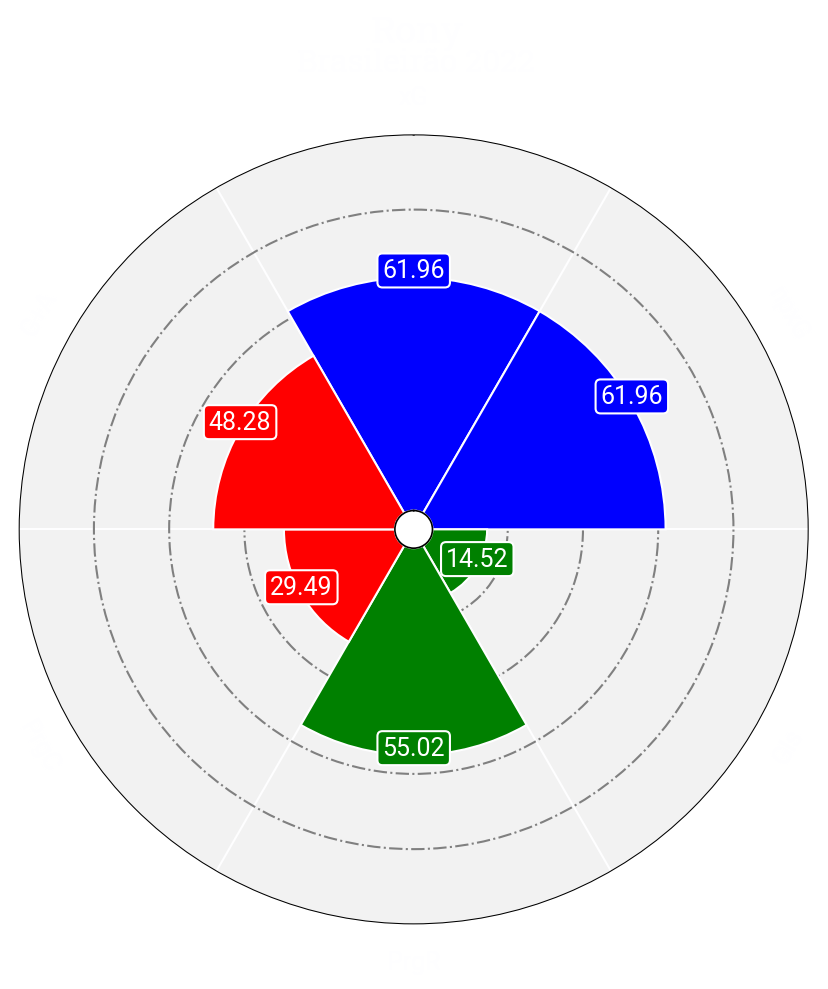

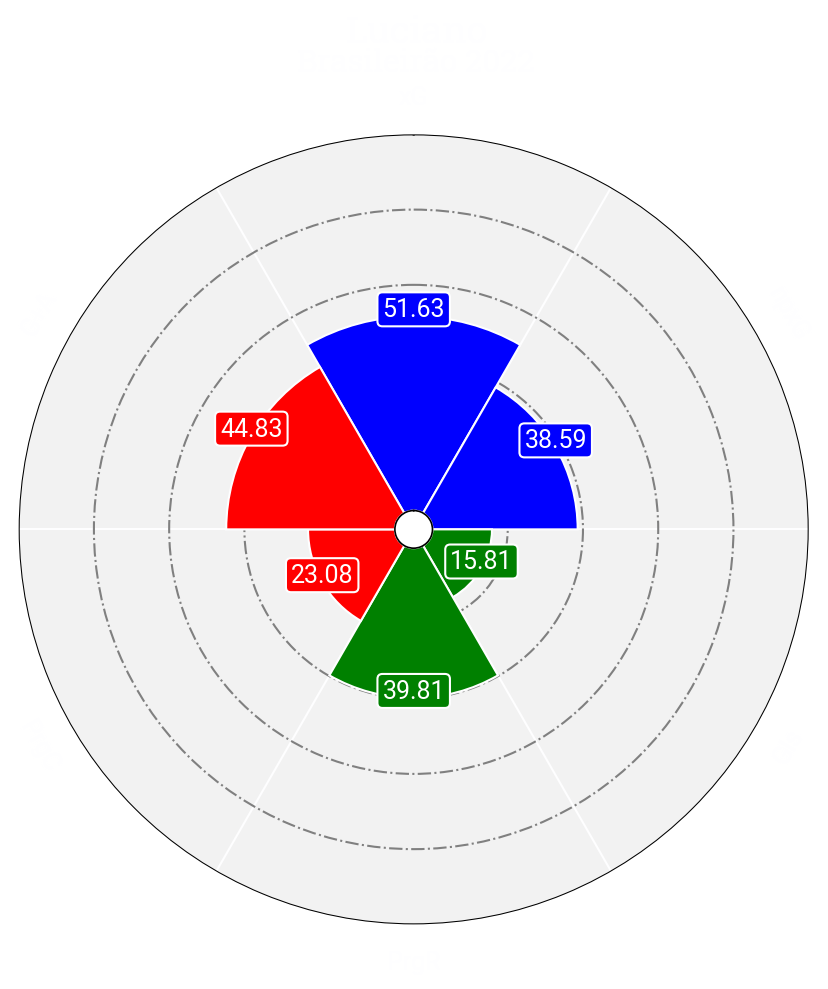

In [10]:
for data in attackers_data:
    radar_plot(stats_atk[:-2], data[:-1], data[-1], "Brasileirão 2022")

- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.

### Análise

Sei menos de futebol do que de estatística, e quase não sei estatística. 

Escolhi os três jogadores ordenando a lista por número de gols e pegando os três primeiros que só possuiam o primeiro nome.

Atributos: Expected Goals, Non-Penalty xG, Goals, Progressive Passes Rec, Progressive Carries e (Goals + Assists)/90. Foram escolhidos na base da troca de ideia com colegas que entendem mais de futebol. É claro que de um (bom) atacante se espera (muitos) gols. De certa forma, é meio redundante olhar para os "sem penâlti", mas às vezes isso revela uma diferença considerável, como no caso do Luciano (e em menor escala, do Hulk). Como os atacantes não jogam sozinhos, considerar as assistências também é importante. Não só isso, mas a capacidade de penetrar no campo inimigo também, e por isso foram escolhidos os atributos de passes progressivos.

A escala dos radares é a padrão do tutorial do soccermatics, porque eu não sabia como mudar. Normalizei os dados da forma "padrão" e escalei eles por 100. Antes de normalizar, os dados foram filtrados por posição. Um aspecto interessante dos dados analisados é que, apesar de ter métricas, no geral, menores, o Luciano tem um número bacana de gols (comprando com os outros 2 jogadores selecionados).

## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

In [ ]:
stats_mid = ["Gls", "Ast", "xAG", "G-PK", "xAG90", "PrgP", "Player", "Pos"]
filter_mid = ["DM", "CM", "LM", "RM", "WM", "AM", "MF", "MFFW"]

In [ ]:
df_mid = clean_and_normalize(df_br, stats_mid, filter_mid)

In [ ]:
mids = ["Everton Ribeiro", "Raphael Veiga", "Edenílson"]

In [ ]:
mids_data = get_players_data(mids, df_mid)

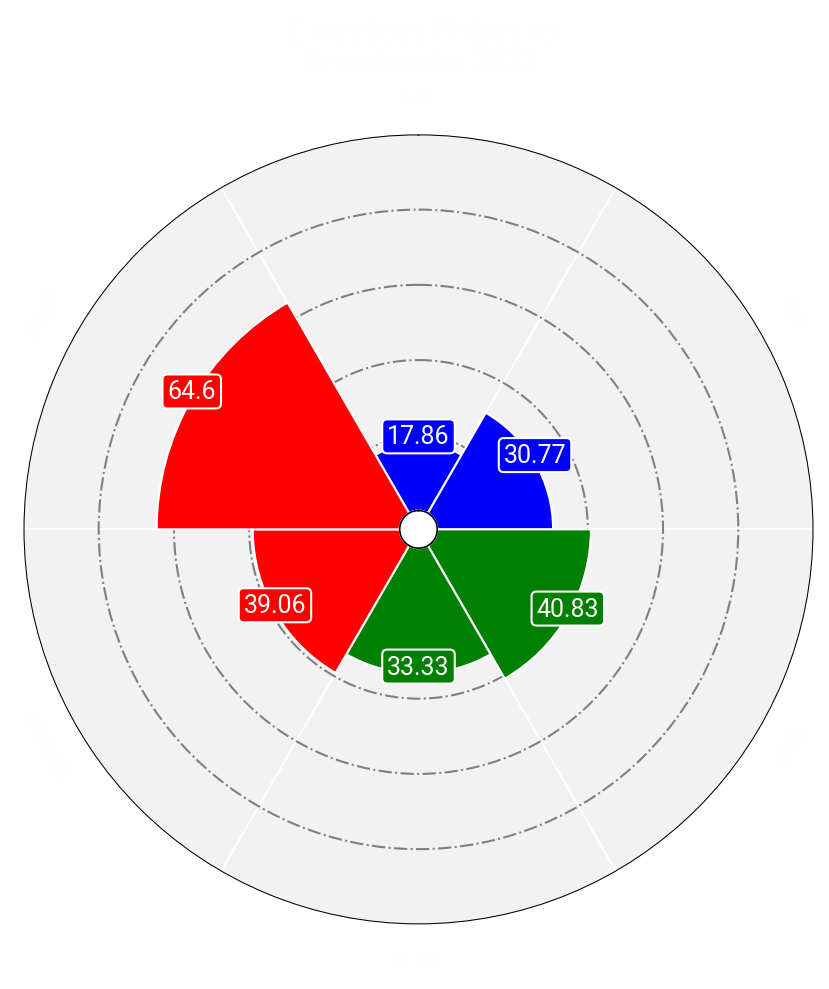

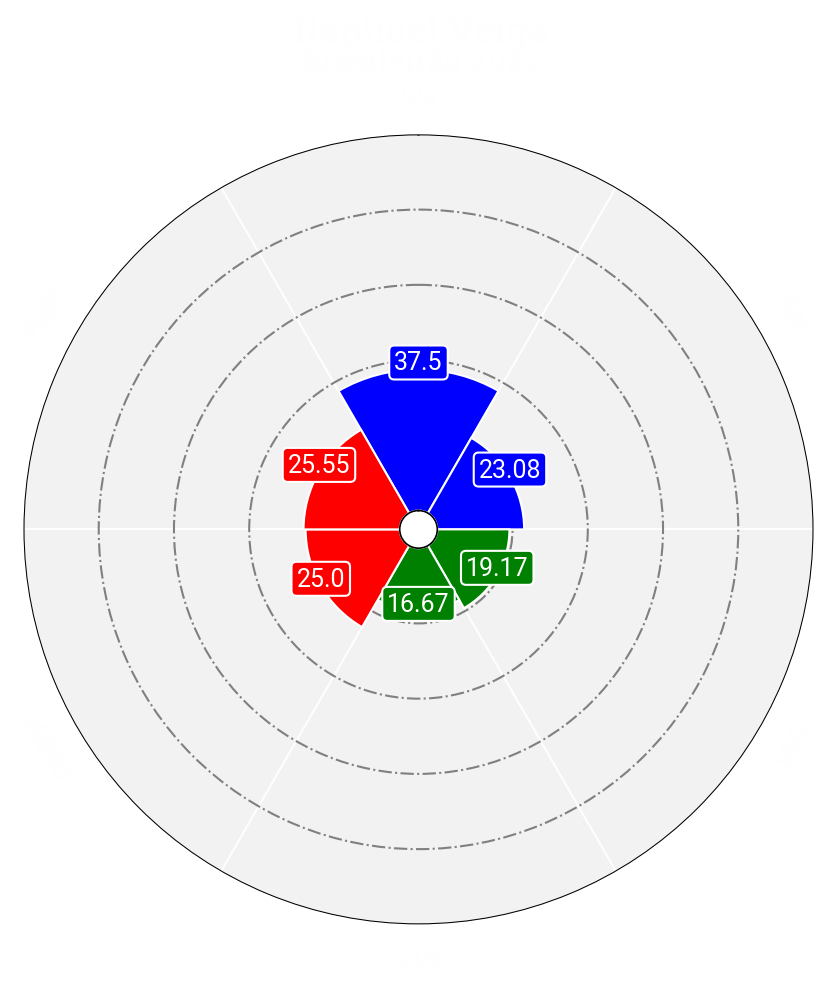

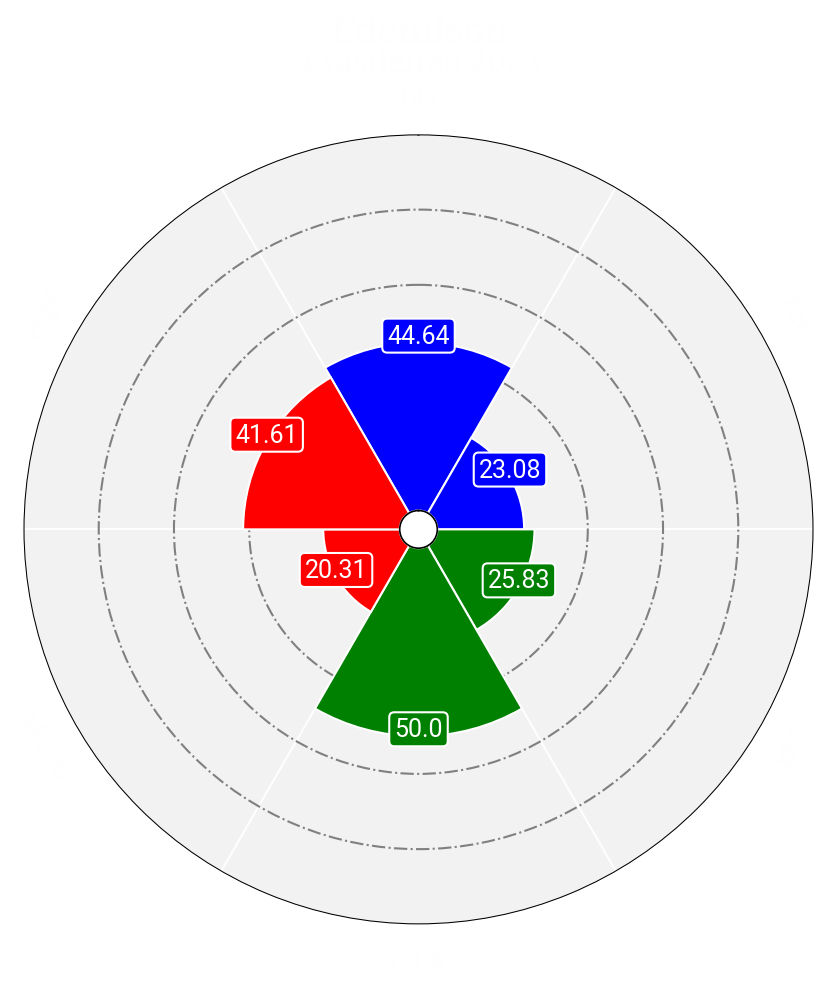

In [11]:
for data in mids_data:
    radar_plot(stats_mid[:-2], data[:-1], data[-1], "Brasileirão 2022")

### Análise

A escolha dos jogadores foi sugestão do meu amigo.

Atributos: Goals, Assists, Expected Assisted Goals, Non-Penalty Goals, Expected Assisted Goals/90, Progressive Passes. Foram escolhidos no chute. Apesar de não ser só atacante que faz gol (por isso apareceu aqui), considerei o papel dos meio campistas mais próximo da assistência (não sei se isso condiz com o jogo), mais tentando proporcionar a chance de ação do que a ação em si. 

O tratamento dos dados foi examente o mesmo de antes. É engraçado ver como o meio de campo varia: o Everton faz mais passes progressivos e poucos gols, o Raphael, apesar de não contribuir muito com passes e assistências, até que faz um bocado de gols e o Edenílson é um jogador mais "balanceado".

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

In [ ]:
df_def = pd.read_csv("./br_def.csv")

In [ ]:
stats_zag = ["Tkl", "TklW", "dTkl", "Tkl%", "Blocks", "Pass", "Player", "Pos"]
filter_zag = ["FB", "LB", "RB", "CB", "DF"]

In [ ]:
df_zag = clean_and_normalize(df_def, stats_zag, filter_zag)

In [ ]:
zags = ["Fagner", "Kevin", "Vitão"]

In [ ]:
zag_data = get_players_data(zags, df_zag)

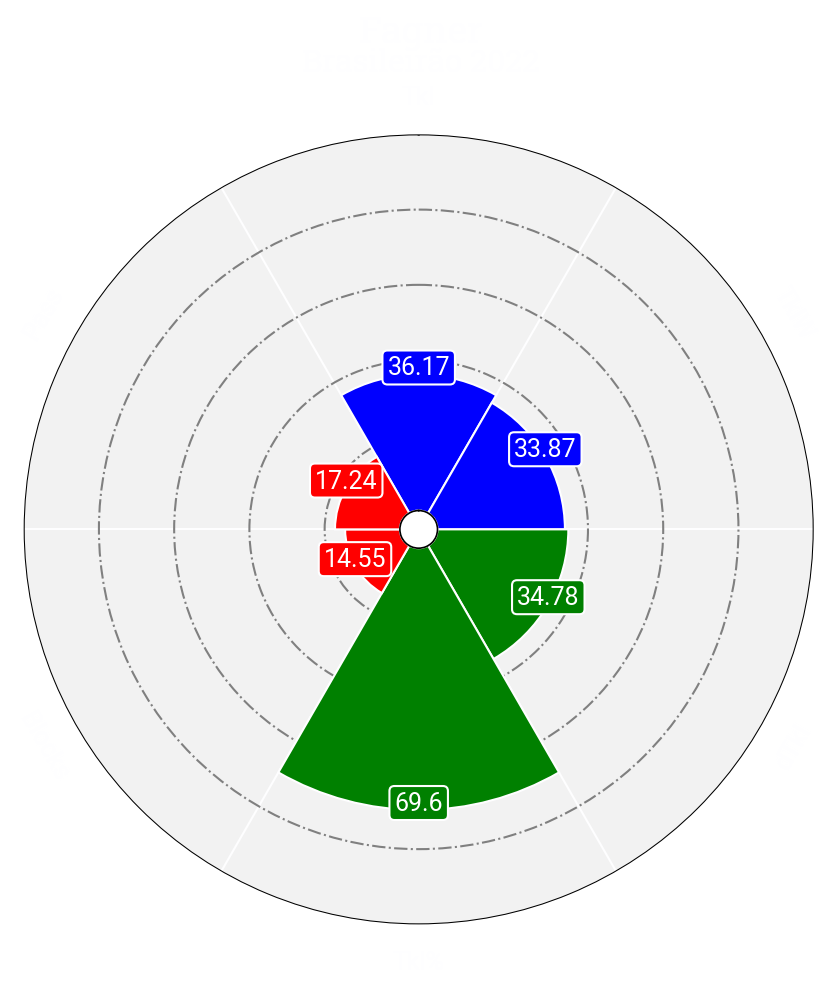

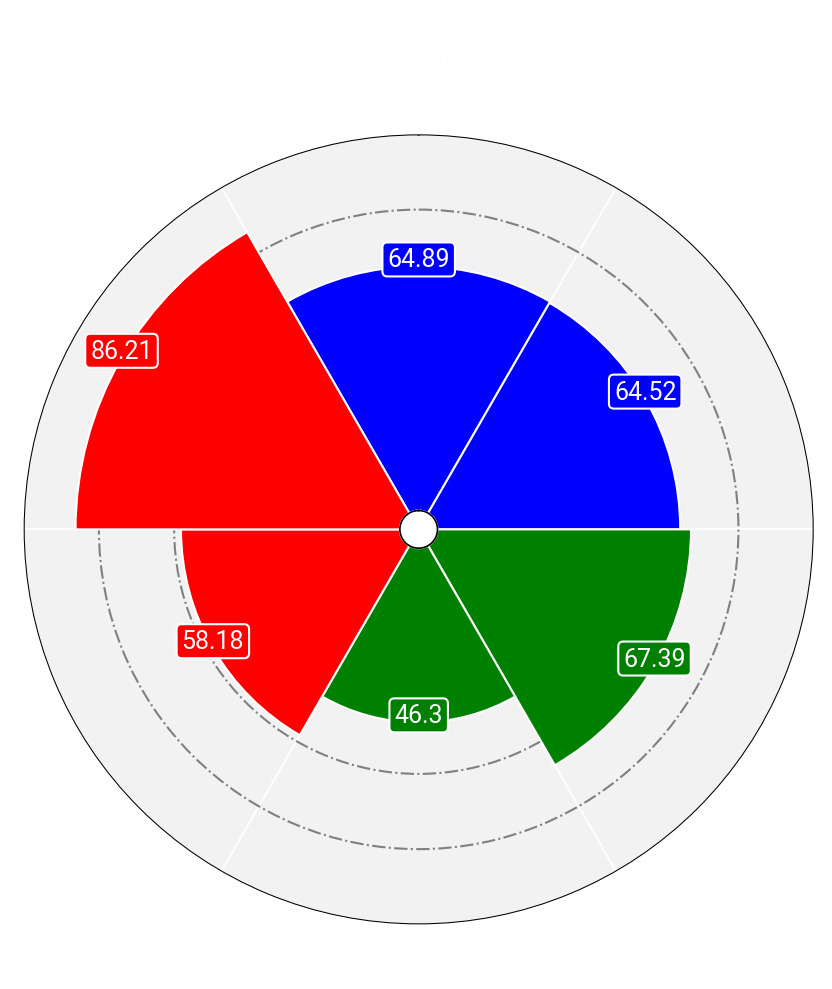

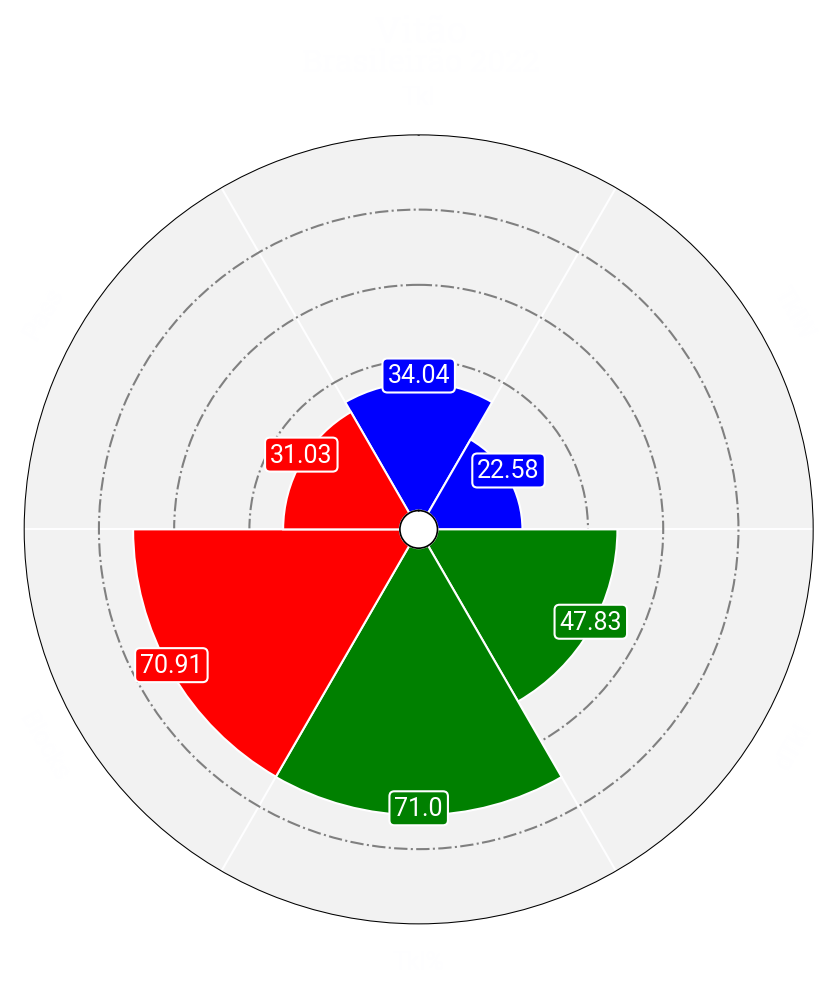

In [12]:
for data in zag_data:
    radar_plot(stats_zag[:-2], data[:-1], data[-1], "Brasileirão 2022")

### Análise

Essa última escolha de jogadores foi completamente arbitrária, passei pelo `csv` procurando jogadores defensivos. No final, fiquei feliz com minhas escolhas.

Atributos: Tackles, Tackles Won, Dribblers Tackled, % of Dribblers Tackled, Blocks, Pass. A escolha desses atributos foi mais fácil do que pros meio campistas, que exigiu algumas presunções. Naturalmente que, quem joga na defesa, precisa tentar (e conseguir) roubar a bola dos jogadores do outro time. Os outros indicadores podem revelar informações do posicionamento do jogador e da sua habilidade em roubar a bola, que podem ser positivas para a defesa.

O tratamento dos dados foi examente o mesmo de antes. Evidentemnte, o Fagner não faz tantos bloqueios e roubos de passes como os outros jogadores escolhidos. De fato, com base nos atributos analisados, ele parece ser um jogador pior como um todo. Por outro lado, o Kevin aparenta possuir um bom domínio de diversas àreas da defesa, enquanto o Vitão é um cara mais de bloqueios.

## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?

### Análise

Olhando somente para os atributos escolhidos, o futebol parece ser 3 jogos diferentes. É claro que existe uma sobreposição (entre atacantes e meio campistas), mas de resto, é como se os jogadores jogassem jogos diferentes. Como eu não tinha nenhuma impressão em particular dos jogadores, não confirmei nem desconfirmei nada. Com certeza os meio campistas parecem ser mais difíceis de se avaliar, especialmente para um leigo.